In [1]:
#Seasonal_ROI
#Genre_ROI
#Budget_ROI

In [2]:
#release_date_analysis_v1
#budget_analysis
#genre_roi
#movies_df2
#movie_genre_analysis

In [3]:
#Import the relevant libraries to explore the datasets

In [4]:
#zippedData/im.db K

#zippedData/tmdb.movies.csv has gernes but need to translate from genre id to actual name 
#usable[genre_ids, original_title]

#zippedData/tn.movie_budgets.csv K only one that has budgets
#useable [movie, production_budget, domestic_gross


In [5]:
type('zippedData/bom.movie_gross.csv.gz')

str

In [6]:
#import all the libraries we need
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3 
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from scipy.interpolate import make_interp_spline

%matplotlib inline



In [7]:
!ls

Data_Exploration.ipynb            student.ipynb
Phase 2 project description.ipynb your_database.db


In [8]:
!pwd

/Users/andrewreusche/Documents/Flatiron2/Phase2/lessons/dsc-phase-2-project-v3/notebooks


In [9]:
#preview the movie genre dataset
movie_genre = pd.read_csv('../zippedData/tmdb.movies.csv', index_col= 0)
movie_genre.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [105]:
movie_genre.genre_ids.apply(lambda x: len(x)).value_counts()

genre_ids
2    35789
5     6567
0     2479
3     1762
4     1237
Name: count, dtype: int64

In [10]:
movie_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [11]:
#this strips the brackets from the lists
movie_genre['genre_ids'] = movie_genre['genre_ids'].apply(lambda x: x[1:-1])
movie_genre['genre_ids'].head()

0        12, 14, 10751
1    14, 12, 16, 10751
2          12, 28, 878
3        16, 35, 10751
4          28, 878, 12
Name: genre_ids, dtype: object

In [12]:
# Step 2: Split the movie_genre column by commas and expand it into individual rows
movie_genre['genre_ids'] = movie_genre['genre_ids'].str.split(',')  # Split by comma into lists
movie_genre = movie_genre.explode('genre_ids', ignore_index=True)  # Expand the lists into separate rows

movie_genre.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
2,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
3,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
4,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [13]:
type(movie_genre['genre_ids'][1])

str

In [14]:
def num_to_genre(num):
    gerne_dict= { '28': 'Action', '12': 'Adventure', '16': 'Animation', '35': 'Comedy',
                  '80': 'Crime', '99': 'Documetary', '18': 'Drama', '10751': 'Family',
                  '14': 'Fantasy', '36': 'History', '27': 'Horror', '10402': 'Music',
                  '9648': 'Mystery', '10749': 'Romance', '878': 'Science Fiction',
                  '10770': 'TV Movie', '53': 'Thriller', '10752': 'War', '37': 'Western'
                  }
    return gerne_dict.get(num)

In [15]:
# Strip whitespace from 'movie_title' column
movie_genre['genre_ids'] = movie_genre['genre_ids'].str.strip()
#Create new row Genre...
movie_genre['Genre']= movie_genre['genre_ids'].apply( lambda x : num_to_genre(x))
movie_genre.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,Genre
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure
1,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy
2,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family
3,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy
4,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure


In [16]:
movie_genre_df2=movie_genre[['title','Genre']]
movie_genre_df2.rename(columns={'title': 'movie', 'Genre': 'genres'}, inplace=True)
movie_genre_df2.head()

/var/folders/p_/7g5qyc8d5zv5nfywm65yhpkc0000gn/T/ipykernel_98186/1401509531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_genre_df2.rename(columns={'title': 'movie', 'Genre': 'genres'}, inplace=True)


,movie,genres
0,Harry Potter and the Deathly Hallows: Part 1,Adventure
1,Harry Potter and the Deathly Hallows: Part 1,Fantasy
2,Harry Potter and the Deathly Hallows: Part 1,Family
3,How to Train Your Dragon,Fantasy
4,How to Train Your Dragon,Adventure


In [17]:
len(movie_genre_df2)

47834

In [18]:
#preview the movie budget dataset
movie_budget = pd.read_csv('../zippedData/tn.movie_budgets.csv', index_col= 0)
movie_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [19]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [20]:
conn = sqlite3.connect('../zippedData/im.db')
cur = conn.cursor()

In [21]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [106]:
conn = sqlite3.connect('../zippedData/im.db')

query= """
        SELECT per.primary_name, mov.genres, mov.primary_title
        FROM persons AS per
        JOIN known_for 
            USING(person_id)
        JOIN movie_basics AS mov 
            USING(movie_id)
        JOIN principals AS pri 
            USING(person_id)
        WHERE pri.category in ('actor', 'actress');
        """

df3 = pd.read_sql(query, conn)
df3.head() 

,primary_name,genres,primary_title
0,Brittania Nicol,"Drama,Horror",The Wicker Tree
1,Henry Garrett,"Biography,Drama,History",Testament of Youth
2,Henry Garrett,"Drama,Thriller",Zero Dark Thirty
3,Henry Garrett,"Drama,Romance",A Little Chaos
4,Graham McTavish,"Adventure,Family,Fantasy",The Hobbit: An Unexpected Journey


In [107]:
df3.genres.apply(lambda x: len(x)).value_counts()

TypeError: object of type 'NoneType' has no len()

In [22]:
conn = sqlite3.connect('../zippedData/im.db')

query= """
        SELECT per.primary_name, mov.genres, mov.primary_title
        FROM persons AS per
        JOIN known_for 
            USING(person_id)
        JOIN movie_basics AS mov 
            USING(movie_id)
        JOIN principals AS pri 
            USING(person_id)
        WHERE pri.category in ('actor', 'actress');
        """

df = pd.read_sql(query, conn)

# Step 2: Split the movie_genre column by commas and expand it into individual rows
df['genres'] = df['genres'].str.split(',')  # Split by comma into lists
df = df.explode('genres', ignore_index=True)  # Expand the lists into separate rows

df.head(10)


,primary_name,genres,primary_title
0,Brittania Nicol,Drama,The Wicker Tree
1,Brittania Nicol,Horror,The Wicker Tree
2,Henry Garrett,Biography,Testament of Youth
3,Henry Garrett,Drama,Testament of Youth
4,Henry Garrett,History,Testament of Youth
5,Henry Garrett,Drama,Zero Dark Thirty
6,Henry Garrett,Thriller,Zero Dark Thirty
7,Henry Garrett,Drama,A Little Chaos
8,Henry Garrett,Romance,A Little Chaos
9,Graham McTavish,Adventure,The Hobbit: An Unexpected Journey


In [23]:
conn = sqlite3.connect('../zippedData/im.db')

query= """
        SELECT mov.genres, mov.primary_title
        FROM movie_basics AS mov;
        """

df = pd.read_sql(query, conn)

# Step 2: Split the movie_genre column by commas and expand it into individual rows
df['genres'] = df['genres'].str.split(',')  # Split by comma into lists
df = df.explode('genres', ignore_index=True)  # Expand the lists into separate rows

df.head(10)

,genres,primary_title
0,Action,Sunghursh
1,Crime,Sunghursh
2,Drama,Sunghursh
3,Biography,One Day Before the Rainy Season
4,Drama,One Day Before the Rainy Season
5,Drama,The Other Side of the Wind
6,Comedy,Sabse Bada Sukh
7,Drama,Sabse Bada Sukh
8,Comedy,The Wandering Soap Opera
9,Drama,The Wandering Soap Opera


In [24]:
movie_genres= df
len(movie_genres)

234958

In [25]:
movie_genres.rename(columns={'primary_title': 'movie'}, inplace=True)


In [26]:
#preview the movie budget dataset
movie_budget = pd.read_csv('../zippedData/tn.movie_budgets.csv', index_col= 0)
movie_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [27]:
len(movie_budget)

5782

In [28]:
movies_df =movie_budget.merge(movie_genres, how='outer', on=['movie'])


movies_df.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Action
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Adventure
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Fantasy
4,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Action


In [29]:
len(movies_df)

238759

In [30]:
movies_df[['movie','genres']]

,movie,genres
0,Avatar,Horror
1,Pirates of the Caribbean: On Stranger Tides,Action
2,Pirates of the Caribbean: On Stranger Tides,Adventure
3,Pirates of the Caribbean: On Stranger Tides,Fantasy
4,Dark Phoenix,Action
...,...,...
238754,Kuambil Lagi Hatiku,Drama
238755,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
238756,Dankyavar Danka,Comedy
238757,6 Gunn,None


In [31]:
movie_genre_df3= pd.concat([movies_df[['movie','genres']], movie_genre_df2])

In [32]:
movies_df2 =movies_df.merge(movie_genre_df3, how='left', on=['movie'])
movies_df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres_x,genres_y
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror,Horror
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror,Action
2,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror,Adventure
3,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror,Fantasy
4,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror,Science Fiction


In [33]:
len(movies_df2)

696900

In [34]:
movies_df2= movies_df2.drop(columns=['genres_x'])
movies_df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres_y
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Action
2,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Adventure
3,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Fantasy
4,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Science Fiction


In [35]:
movies_df2.drop_duplicates(keep='first', inplace=True)
len(movies_df2)

241993

In [36]:
movies_df2[movies_df2['movie']=='Avatar']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres_y
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Action
2,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Adventure
3,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Fantasy
4,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Science Fiction


In [37]:
movies_df2.rename(columns={'genres_y': 'genres'}, inplace=True)

In [38]:
movies_df2.drop(columns=['worldwide_gross'], inplace=True)


In [39]:
movies_df2.head()

,release_date,movie,production_budget,domestic_gross,genres
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",Horror
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",Action
2,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",Adventure
3,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",Fantasy
4,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",Science Fiction


In [40]:
movies_df2.dropna(subset=['production_budget', 'domestic_gross'], inplace=True)


In [41]:
x=['production_budget','domestic_gross']

for col in x:
    movies_df2[col] = movies_df2[col].replace({'\$': '', ',': ''}, regex=True).astype(int)

movies_df2.head()

,release_date,movie,production_budget,domestic_gross,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,Horror
1,"Dec 18, 2009",Avatar,425000000,760507625,Action
2,"Dec 18, 2009",Avatar,425000000,760507625,Adventure
3,"Dec 18, 2009",Avatar,425000000,760507625,Fantasy
4,"Dec 18, 2009",Avatar,425000000,760507625,Science Fiction


In [42]:
movies_df2['ROI']=movies_df2['domestic_gross']-movies_df2['production_budget']

In [43]:
movies_df2.head()

,release_date,movie,production_budget,domestic_gross,genres,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625,Horror,335507625
1,"Dec 18, 2009",Avatar,425000000,760507625,Action,335507625
2,"Dec 18, 2009",Avatar,425000000,760507625,Adventure,335507625
3,"Dec 18, 2009",Avatar,425000000,760507625,Fantasy,335507625
4,"Dec 18, 2009",Avatar,425000000,760507625,Science Fiction,335507625


In [44]:
movies_df2['ROI'].describe()

count    1.180500e+04
mean     1.033630e+07
std      5.558002e+07
min     -3.072376e+08
25%     -1.068575e+07
50%     -7.306330e+05
75%      1.803572e+07
max      6.306622e+08
Name: ROI, dtype: float64

In [45]:
budget_analysis=movies_df2[['movie','production_budget','ROI']]
budget_analysis.head()

,movie,production_budget,ROI
0,Avatar,425000000,335507625
1,Avatar,425000000,335507625
2,Avatar,425000000,335507625
3,Avatar,425000000,335507625
4,Avatar,425000000,335507625


In [46]:
len(budget_analysis)

11805

In [47]:
budget_analysis = budget_analysis.drop_duplicates(subset=['movie'], keep='first')
len(budget_analysis)


5698

In [48]:
budget_analysis.head()

,movie,production_budget,ROI
0,Avatar,425000000,335507625
5,Pirates of the Caribbean: On Stranger Tides,410600000,-169536125
23,Dark Phoenix,350000000,-307237650
32,Avengers: Age of Ultron,330600000,128405868
50,Star Wars Ep. VIII: The Last Jedi,317000000,303181382


In [49]:
movie_genre_analysis=movies_df2[['movie','genres','ROI']]
movie_genre_analysis.head()

,movie,genres,ROI
0,Avatar,Horror,335507625
1,Avatar,Action,335507625
2,Avatar,Adventure,335507625
3,Avatar,Fantasy,335507625
4,Avatar,Science Fiction,335507625


In [50]:
len(movie_genre_analysis)

11805

In [51]:
movie_genre_analysis.groupby('genres')['ROI'].describe()


,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,736.0,6.833459e+06,7.263229e+07,-307237650.0,-20047480.50,-3500000.0,17921235.25,500059566.0
Adventure,530.0,1.422713e+07,8.974524e+07,-307237650.0,-24196597.50,-2000000.0,29501652.00,500059566.0
Animation,168.0,3.670118e+07,1.000852e+08,-128607242.0,-15176274.75,2343960.0,52356944.50,500059566.0
Biography,235.0,8.309352e+06,3.916829e+07,-74979242.0,-10863950.00,-800000.0,17835934.00,292126372.0
Comedy,849.0,1.496960e+07,5.042141e+07,-114911680.0,-6617054.00,-60000.0,23059911.00,314508916.0
Crime,429.0,4.684635e+06,4.042812e+07,-99925825.0,-12343312.00,-2549154.0,11397291.00,348720947.0
Documentary,362.0,4.804843e+06,3.822121e+07,-106135493.0,-8158782.50,-975000.0,8268944.00,262563408.0
Documetary,87.0,2.072152e+06,2.501994e+07,-60577681.0,-6362207.50,-540889.0,896414.50,102280354.0
Drama,1436.0,7.145398e+06,4.202843e+07,-136637525.0,-9926644.50,-992964.0,13990796.75,356057266.0


In [52]:
movies_df2.head()

,release_date,movie,production_budget,domestic_gross,genres,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625,Horror,335507625
1,"Dec 18, 2009",Avatar,425000000,760507625,Action,335507625
2,"Dec 18, 2009",Avatar,425000000,760507625,Adventure,335507625
3,"Dec 18, 2009",Avatar,425000000,760507625,Fantasy,335507625
4,"Dec 18, 2009",Avatar,425000000,760507625,Science Fiction,335507625


In [53]:
release_date_analysis=movies_df2[['release_date','movie','ROI']]
release_date_analysis.head()

,release_date,movie,ROI
0,"Dec 18, 2009",Avatar,335507625
1,"Dec 18, 2009",Avatar,335507625
2,"Dec 18, 2009",Avatar,335507625
3,"Dec 18, 2009",Avatar,335507625
4,"Dec 18, 2009",Avatar,335507625


In [54]:
len(release_date_analysis)

11805

In [55]:
release_date_analysis_v1=release_date_analysis.drop_duplicates(keep='first')
release_date_analysis_v1.head()

,release_date,movie,ROI
0,"Dec 18, 2009",Avatar,335507625
5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125
23,"Jun 7, 2019",Dark Phoenix,-307237650
32,"May 1, 2015",Avengers: Age of Ultron,128405868
50,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,303181382


In [56]:
len(release_date_analysis_v1)

5782

## Datasets shown here

In [57]:
release_date_analysis_v1.head()

,release_date,movie,ROI
0,"Dec 18, 2009",Avatar,335507625
5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125
23,"Jun 7, 2019",Dark Phoenix,-307237650
32,"May 1, 2015",Avengers: Age of Ultron,128405868
50,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,303181382


In [58]:
movie_genre_analysis.head()

,movie,genres,ROI
0,Avatar,Horror,335507625
1,Avatar,Action,335507625
2,Avatar,Adventure,335507625
3,Avatar,Fantasy,335507625
4,Avatar,Science Fiction,335507625


In [59]:
budget_analysis.head()

,movie,production_budget,ROI
0,Avatar,425000000,335507625
5,Pirates of the Caribbean: On Stranger Tides,410600000,-169536125
23,Dark Phoenix,350000000,-307237650
32,Avengers: Age of Ultron,330600000,128405868
50,Star Wars Ep. VIII: The Last Jedi,317000000,303181382


## workd on finalizing release date data

In [60]:
release_date_analysis_v1.head()

,release_date,movie,ROI
0,"Dec 18, 2009",Avatar,335507625
5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125
23,"Jun 7, 2019",Dark Phoenix,-307237650
32,"May 1, 2015",Avengers: Age of Ultron,128405868
50,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,303181382


In [61]:
release_date_analysis_v1['Release_Month']= release_date_analysis_v1['release_date'].str[:3]
release_date_analysis_v1.head()

/var/folders/p_/7g5qyc8d5zv5nfywm65yhpkc0000gn/T/ipykernel_98186/99973177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  release_date_analysis_v1['Release_Month']= release_date_analysis_v1['release_date'].str[:3]


,release_date,movie,ROI,Release_Month
0,"Dec 18, 2009",Avatar,335507625,Dec
5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125,May
23,"Jun 7, 2019",Dark Phoenix,-307237650,Jun
32,"May 1, 2015",Avengers: Age of Ultron,128405868,May
50,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,303181382,Dec


In [62]:
def month_to_season(month):
    season_dict= { 'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
                  'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
                  'Sep': 'Fall', 'Oct': 'Fall', 'Nov': 'Fall',
                  'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter'}
    return season_dict.get(month)
    

In [63]:
release_date_analysis_v1['Season']= release_date_analysis_v1['Release_Month'].apply( lambda x : month_to_season(x))
release_date_analysis_v1.head()

/var/folders/p_/7g5qyc8d5zv5nfywm65yhpkc0000gn/T/ipykernel_98186/1832510162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  release_date_analysis_v1['Season']= release_date_analysis_v1['Release_Month'].apply( lambda x : month_to_season(x))


,release_date,movie,ROI,Release_Month,Season
0,"Dec 18, 2009",Avatar,335507625,Dec,Winter
5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125,May,Spring
23,"Jun 7, 2019",Dark Phoenix,-307237650,Jun,Summer
32,"May 1, 2015",Avengers: Age of Ultron,128405868,May,Spring
50,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,303181382,Dec,Winter


In [64]:
Seasonal_ROI = release_date_analysis_v1[['Season','ROI']]
Seasonal_ROI.head()

,Season,ROI
0,Winter,335507625
5,Spring,-169536125
23,Summer,-307237650
32,Spring,128405868
50,Winter,303181382


In [65]:
Seasonal_ROI.groupby('Season')['ROI'].describe()

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Fall,1552.0,6.792027e+06,4.101982e+07,-120702809.0,-10294467.75,-768535.5,14144314.50,356057266.0
Spring,1331.0,9.935669e+06,5.109783e+07,-201941321.0,-8171652.00,-484567.0,14455140.00,449998007.0
Summer,1415.0,1.566553e+07,5.583782e+07,-307237650.0,-7361893.00,817468.0,25069405.50,437270625.0
Winter,1484.0,9.123205e+06,5.097822e+07,-150000000.0,-9962407.75,-649276.5,17324895.25,630662225.0


## work on finalizing genre data

In [66]:
movie_genre_analysis.head()

,movie,genres,ROI
0,Avatar,Horror,335507625
1,Avatar,Action,335507625
2,Avatar,Adventure,335507625
3,Avatar,Fantasy,335507625
4,Avatar,Science Fiction,335507625


In [67]:
len(movie_genre_analysis)

11805

In [68]:
movie_genre_analysis[movie_genre_analysis['genres'].isna()]

,movie,genres,ROI
50,Star Wars Ep. VIII: The Last Jedi,NaN,303181382
51,Star Wars Ep. VII: The Force Awakens,NaN,630662225
70,Pirates of the Caribbean: At Worldâs End,NaN,9420425
212,Spider-Man 3,NaN,78530303
267,Harry Potter and the Half-Blood Prince,NaN,52089278
...,...,...,...
85417,Cavite,NaN,63071
85418,The Mongol King,NaN,-6100
85428,Following,NaN,42482
85429,Return to the Land of Wonders,NaN,-3662


In [69]:
movie_genre_analysis.dropna(subset=['genres'], inplace=True)


/var/folders/p_/7g5qyc8d5zv5nfywm65yhpkc0000gn/T/ipykernel_98186/382099810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_genre_analysis.dropna(subset=['genres'], inplace=True)


In [70]:
len(movie_genre_analysis)

8296

In [71]:
movie_genre_analysis.head()

,movie,genres,ROI
0,Avatar,Horror,335507625
1,Avatar,Action,335507625
2,Avatar,Adventure,335507625
3,Avatar,Fantasy,335507625
4,Avatar,Science Fiction,335507625


In [72]:
Genre_ROI=movie_genre_analysis[['genres','ROI']]
Genre_ROI.head()

,genres,ROI
0,Horror,335507625
1,Action,335507625
2,Adventure,335507625
3,Fantasy,335507625
4,Science Fiction,335507625


## work on finalizing budget data

In [73]:
budget_analysis.head()

,movie,production_budget,ROI
0,Avatar,425000000,335507625
5,Pirates of the Caribbean: On Stranger Tides,410600000,-169536125
23,Dark Phoenix,350000000,-307237650
32,Avengers: Age of Ultron,330600000,128405868
50,Star Wars Ep. VIII: The Last Jedi,317000000,303181382


In [74]:
Budget_ROI= budget_analysis[['production_budget', 'ROI']]
Budget_ROI.head()

,production_budget,ROI
0,425000000,335507625
5,410600000,-169536125
23,350000000,-307237650
32,330600000,128405868
50,317000000,303181382


In [75]:
len(Budget_ROI)

5698

## start exploring the data distrobutions

In [ ]:
#Seasonal_ROI
#Genre_ROI
#Budget_ROI

In [76]:
Seasonal_ROI['Season'].value_counts()

Season
Fall      1552
Winter    1484
Summer    1415
Spring    1331
Name: count, dtype: int64

(array([1484.,    0.,    0., 1331.,    0.,    0., 1415.,    0.,    0.,
        1552.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

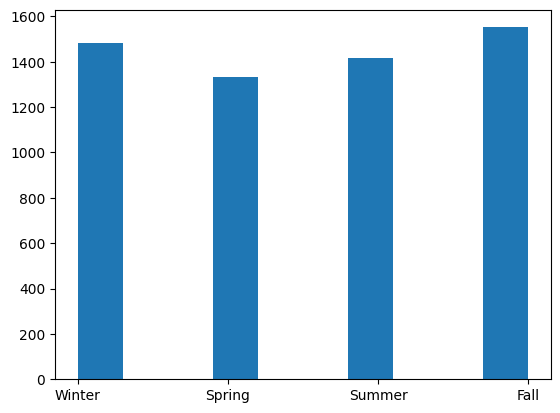

In [83]:
plt.hist(Seasonal_ROI['Season'])

(array([1.000e+00, 1.300e+01, 5.500e+02, 4.763e+03, 3.430e+02, 7.200e+01,
        2.800e+01, 8.000e+00, 3.000e+00, 1.000e+00]),
 array([-3.07237650e+08, -2.13447662e+08, -1.19657675e+08, -2.58676875e+07,
         6.79223000e+07,  1.61712288e+08,  2.55502275e+08,  3.49292262e+08,
         4.43082250e+08,  5.36872238e+08,  6.30662225e+08]),
 <BarContainer object of 10 artists>)

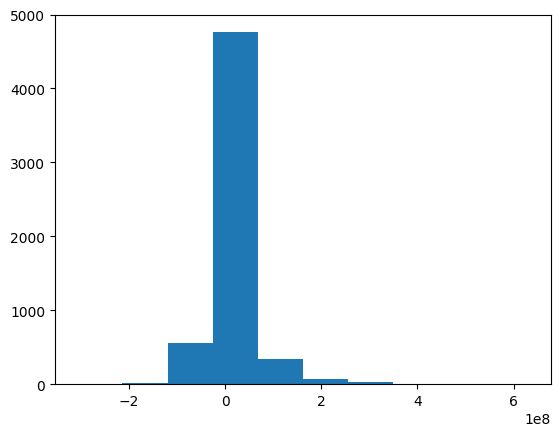

In [84]:
plt.hist(Seasonal_ROI['ROI'])

In [77]:
Genre_ROI['genres'].value_counts()

genres
Drama              1436
Comedy              849
Thriller            764
Action              736
Adventure           530
Horror              434
Crime               429
Romance             410
Documentary         362
Mystery             314
Family              309
Fantasy             278
Science Fiction     246
Biography           235
Sci-Fi              223
Animation           168
History             135
Music               109
Documetary           87
War                  86
Sport                71
Western              36
Musical              31
TV Movie             10
News                  7
Reality-TV            1
Name: count, dtype: int64

In [95]:
Genre_ROI.groupby('genres')['ROI'].mean().sort_values()

genres
News              -1.864393e+07
Western           -5.979256e+06
Reality-TV        -1.000000e+06
History           -7.656518e+05
Documetary         2.072152e+06
TV Movie           3.398330e+06
Crime              4.684635e+06
Documentary        4.804843e+06
Thriller           5.314386e+06
War                6.212424e+06
Action             6.833459e+06
Drama              7.145398e+06
Mystery            7.384437e+06
Biography          8.309352e+06
Horror             8.589921e+06
Romance            9.438491e+06
Sport              9.652116e+06
Fantasy            1.343444e+07
Music              1.345080e+07
Adventure          1.422713e+07
Comedy             1.496960e+07
Science Fiction    1.695967e+07
Sci-Fi             1.913102e+07
Family             2.307126e+07
Animation          3.670118e+07
Musical            3.938993e+07
Name: ROI, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Horror'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Fantasy'),
  Text(4, 0, 'Science Fiction'),
  Text(5, 0, 'Sci-Fi'),
  Text(6, 0, 'Thriller'),
  Text(7, 0, 'Crime'),
  Text(8, 0, 'Drama'),
  Text(9, 0, 'Western'),
  Text(10, 0, 'Animation'),
  Text(11, 0, 'Comedy'),
  Text(12, 0, 'Family'),
  Text(13, 0, 'History'),
  Text(14, 0, 'Documentary'),
  Text(15, 0, 'Musical'),
  Text(16, 0, 'Documetary'),
  Text(17, 0, 'Romance'),
  Text(18, 0, 'Mystery'),
  Text(19, 0, 'Biography'),
  Text(20, 0, 'War'),
  Text(21, 0, 'Sport'),
  Text(22, 0, 'Music'),
  Text(23, 0, 'News'),
  Text(24, 0, 'TV Movie'),
  Text(25, 0, 'Reality-TV')])

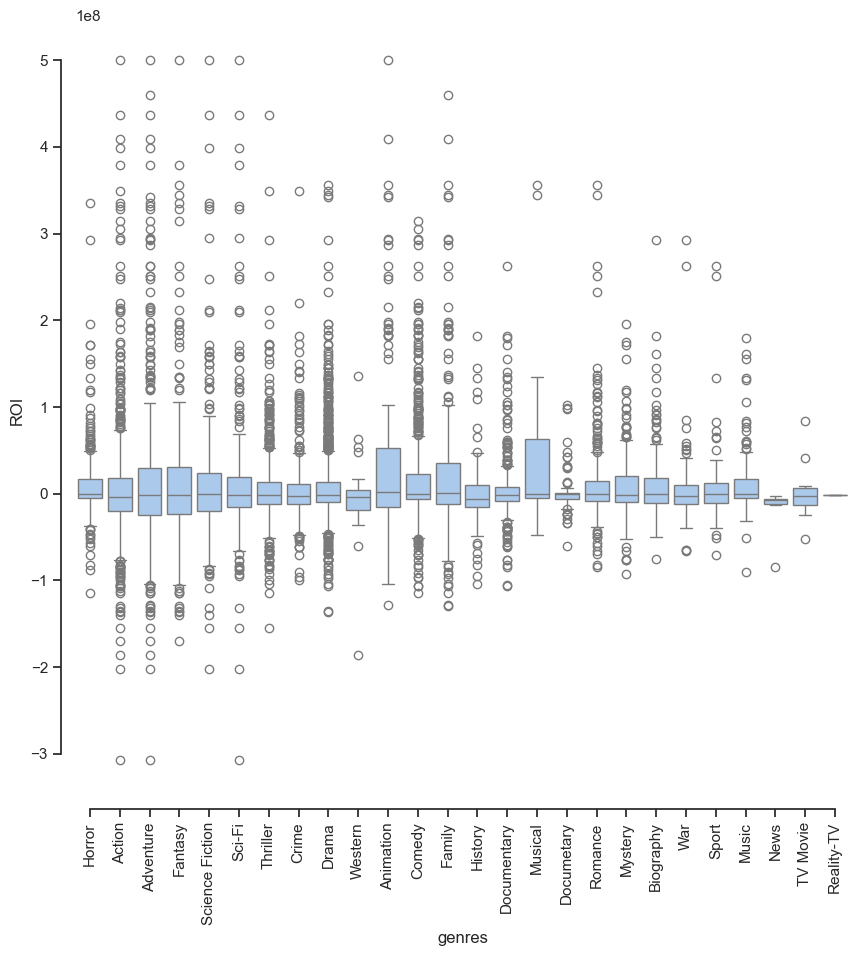

In [115]:

sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
plt.figure(figsize=(10, 10))
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="genres", y="ROI", 
            #hue="smoker", palette=["m", "g"],
            data=Genre_ROI)
sns.despine(offset=10, trim=True)

plt.xticks(rotation=90)

(array([3.000e+00, 1.500e+01, 2.650e+02, 5.799e+03, 1.727e+03, 2.890e+02,
        9.700e+01, 5.600e+01, 3.200e+01, 1.300e+01]),
 array([-3.07237650e+08, -2.26507928e+08, -1.45778207e+08, -6.50484852e+07,
         1.56812364e+07,  9.64109580e+07,  1.77140680e+08,  2.57870401e+08,
         3.38600123e+08,  4.19329844e+08,  5.00059566e+08]),
 <BarContainer object of 10 artists>)

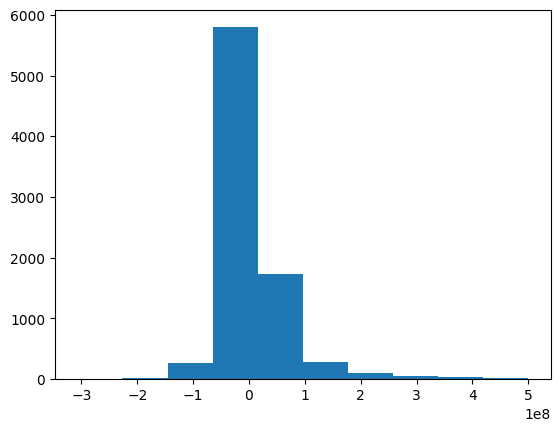

In [86]:
plt.hist(Genre_ROI['ROI'])

In [79]:
#most definitely going to have to bin these

Budget_ROI['production_budget'].value_counts()

production_budget
20000000    226
10000000    209
30000000    175
15000000    171
40000000    170
           ... 
14400000      1
14600000      1
15250000      1
15300000      1
1100          1
Name: count, Length: 500, dtype: int64

In [80]:
Budget_ROI['production_budget'].describe()

count    5.698000e+03
mean     3.181423e+07
std      4.197735e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

(array([4.366e+03, 8.480e+02, 2.280e+02, 1.440e+02, 7.700e+01, 1.900e+01,
        6.000e+00, 7.000e+00, 1.000e+00, 2.000e+00]),
 array([1.1000000e+03, 4.2500990e+07, 8.5000880e+07, 1.2750077e+08,
        1.7000066e+08, 2.1250055e+08, 2.5500044e+08, 2.9750033e+08,
        3.4000022e+08, 3.8250011e+08, 4.2500000e+08]),
 <BarContainer object of 10 artists>)

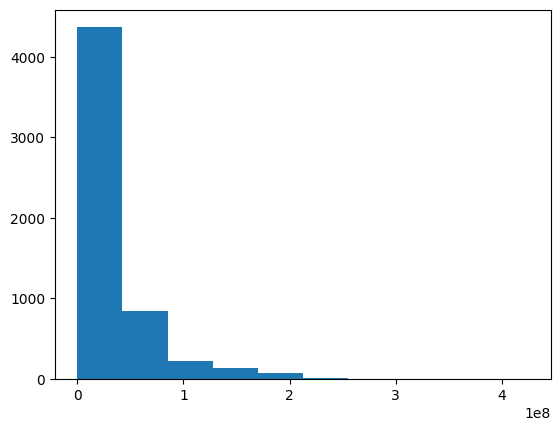

In [81]:
plt.hist(Budget_ROI['production_budget'])

(array([1.000e+00, 1.300e+01, 5.450e+02, 4.695e+03, 3.350e+02, 7.000e+01,
        2.800e+01, 7.000e+00, 3.000e+00, 1.000e+00]),
 array([-3.07237650e+08, -2.13447662e+08, -1.19657675e+08, -2.58676875e+07,
         6.79223000e+07,  1.61712288e+08,  2.55502275e+08,  3.49292262e+08,
         4.43082250e+08,  5.36872238e+08,  6.30662225e+08]),
 <BarContainer object of 10 artists>)

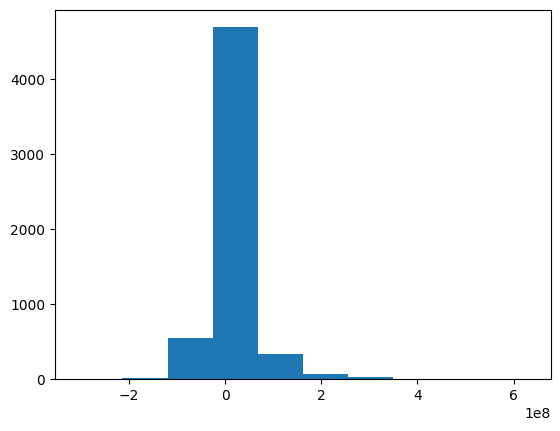

In [82]:
plt.hist(Budget_ROI['ROI'])

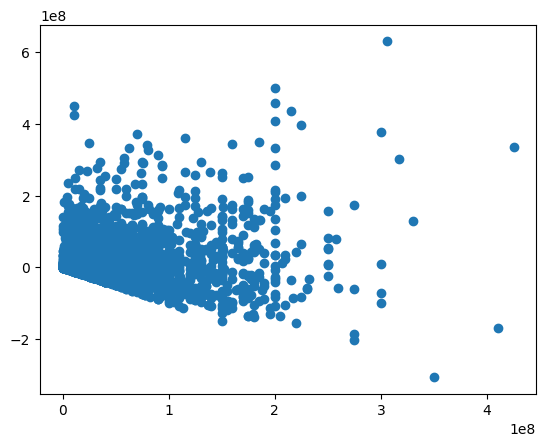

In [96]:
plt.scatter(Budget_ROI['production_budget'], Budget_ROI['ROI'])

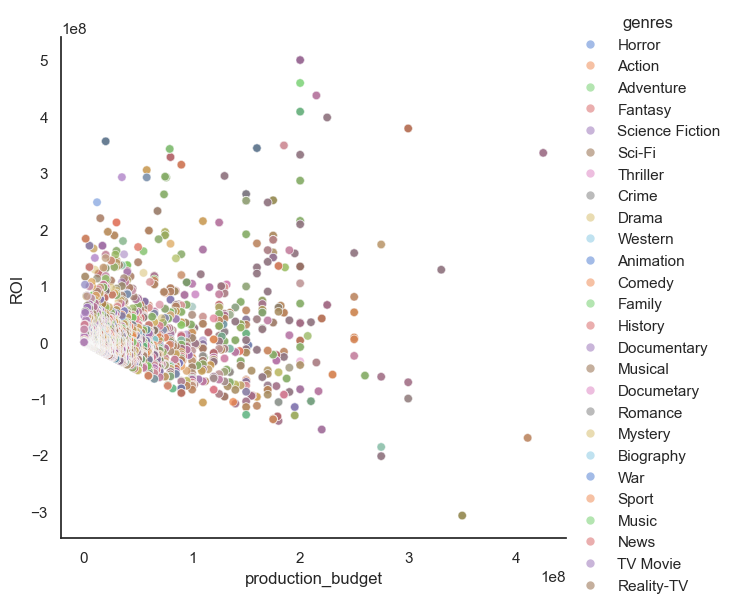

In [98]:

sns.set_theme(style="white")

# Load the example mpg dataset

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x='production_budget', y='ROI', hue='genres',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=movies_df2)

In [102]:
movie_genre_analysis['movie'].value_counts()

movie
Home                 48
The Gift             22
Legend               18
Crossroads           16
Life                 16
                     ..
The Beaver            1
Held Up               1
For Colored Girls     1
Blockers              1
The Namesake          1
Name: count, Length: 2424, dtype: int64

In [104]:
budget_analysis['movie'].value_counts()

movie
Avatar                1
Ultramarines          1
Glitter               1
Bright Star           1
Club Dread            1
                     ..
The Age of Adaline    1
Glory Road            1
John Wick             1
Pokemon 2000          1
My Date With Drew     1
Name: count, Length: 5698, dtype: int64